In [27]:
# This code is to make violin plots of LNG export terminal database
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
DF = pd.read_excel("FinalTariffList.xlsx", engine='openpyxl', sheet_name='Tariff_by_Terminal', dtype={'Names': str})

In [29]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4631 entries, 0 to 4630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4370 non-null   float64
 1   label           4370 non-null   object 
 2   Test            4370 non-null   float64
 3   eiaid           4370 non-null   float64
 4   In LNG File?    4370 non-null   float64
 5   State           4370 non-null   object 
 6   County          4370 non-null   object 
 7   State-County    4370 non-null   object 
 8   LNG Terminal    4370 non-null   object 
 9   Demand_Flat     2868 non-null   float64
 10  Demand_TOU      1127 non-null   float64
 11  Energy_Flat     0 non-null      float64
 12  Energy_TOU      4370 non-null   float64
 13  Demand?         4370 non-null   object 
 14  Demand_Flat?    4370 non-null   object 
 15  Demand_TOU?     4370 non-null   object 
 16  Energy_TOU?     4370 non-null   object 
 17  Rate Structure  4370 non-null   o

In [30]:
DF_ExcludeOutliers = DF[(DF['Energy_TOU'] < .2) & (DF['Energy_TOU'] > 0)]
#DF_ExcludeOutliers_Demand = DF[(DF['Energy_TOU'] < .3) & (DF['Energy_TOU'] > 0)]

In [31]:
DF_ExcludeOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4368
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4348 non-null   float64
 1   label           4348 non-null   object 
 2   Test            4348 non-null   float64
 3   eiaid           4348 non-null   float64
 4   In LNG File?    4348 non-null   float64
 5   State           4348 non-null   object 
 6   County          4348 non-null   object 
 7   State-County    4348 non-null   object 
 8   LNG Terminal    4348 non-null   object 
 9   Demand_Flat     2866 non-null   float64
 10  Demand_TOU      1126 non-null   float64
 11  Energy_Flat     0 non-null      float64
 12  Energy_TOU      4348 non-null   float64
 13  Demand?         4348 non-null   object 
 14  Demand_Flat?    4348 non-null   object 
 15  Demand_TOU?     4348 non-null   object 
 16  Energy_TOU?     4348 non-null   object 
 17  Rate Structure  4348 non-null   o

In [32]:
Existing_LNG_Terminal_Name = ['Sabine Pass', 'Cove Point', 'Elba Island', 'Corpus Christi', 'Cameron', 'Freeport', 'Golden Pass',
                             'Calcasieu Pass', 'Lake Charles LNG', 'Port Arthure LNG', 'Plaquemines LNG', 'Everett']

In [33]:
DF_Existing_Energy = DF_ExcludeOutliers[DF_ExcludeOutliers.LNG_Terminal.isin(Existing_LNG_Terminal_Name)]


AttributeError: 'DataFrame' object has no attribute 'LNG_Terminal'

In [34]:
DF_Existing_Energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 0 to 4934
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3513 non-null   int64  
 1   label           3513 non-null   object 
 2   Test            3513 non-null   bool   
 3   eiaid           3513 non-null   int64  
 4   In LNG File?    3513 non-null   int64  
 5   State           3513 non-null   object 
 6   County          3513 non-null   object 
 7   State-County    3513 non-null   object 
 8   LNG_Terminal    3513 non-null   object 
 9   Demand_Flat     2438 non-null   float64
 10  Demand_TOU      847 non-null    float64
 11  Energy_Flat     0 non-null      float64
 12  Energy_TOU      3513 non-null   float64
 13  Demand_TOU?     3513 non-null   object 
 14  Energy_TOU?     3513 non-null   object 
 15  Rate_Structure  3513 non-null   object 
 16  name            3513 non-null   object 
dtypes: bool(1), float64(4), int64(3),

In [35]:
Energy_TOU = DF_Existing_Energy.Energy_TOU
Energy_Flat = DF_Existing_Energy.Energy_Flat
Demand_Flat = DF_Existing_Energy.Demand_Flat
Demand_TOU = DF_Existing_Energy.Demand_TOU
LNG_Terminal = DF_Existing_Energy.LNG_Terminal
Rate_Structure = DF_Existing_Energy.Rate_Structure

<ipython-input-36-91fd3d233a34>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


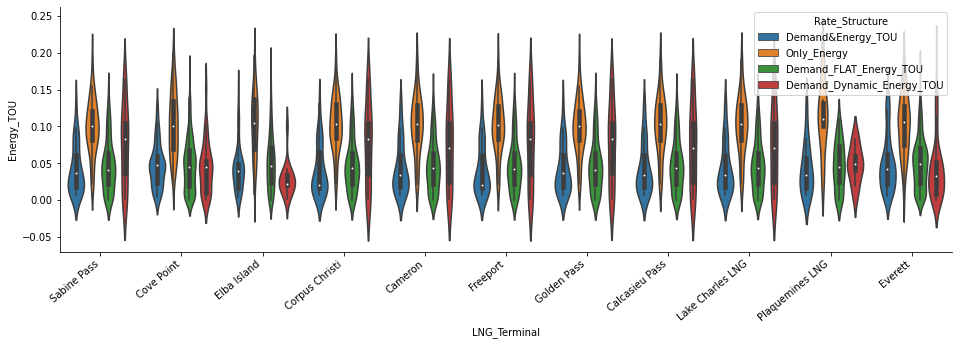

In [36]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
fig.set_size_inches(16, 4.5)
sns.violinplot(x=LNG_Terminal, y = Energy_TOU, data = DF_Existing_Energy, hue=Rate_Structure, ax=ax)
sns.despine()

In [37]:
DF_Demand_Flat_Energy_TOU = DF_Existing_Energy[(DF_Existing_Energy['Rate_Structure'])=='Demand_FLAT_Energy_TOU']
DF_Demand_Flat_Energy_TOU.Rate_Structure.describe()

count                       2084
unique                         1
top       Demand_FLAT_Energy_TOU
freq                        2084
Name: Rate_Structure, dtype: object

<ipython-input-38-b562c547f2a3>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


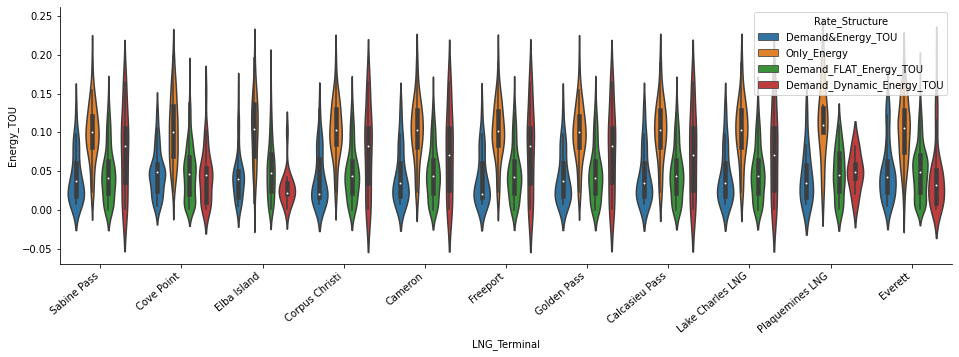

In [38]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
fig.set_size_inches(16, 4.72)
sns.violinplot(x=LNG_Terminal, y = Energy_TOU, data = DF_Demand_Flat_Energy_TOU, hue=Rate_Structure, ax=ax)
sns.despine()

In [39]:
DF_Demand_Flat_Energy_TOU.groupby("LNG_Terminal")['Energy_TOU'].describe().reset_index()

,LNG_Terminal,count,mean,std,min,25%,50%,75%,max
0,Calcasieu Pass,149.0,0.047333,0.034579,0.000065,0.021605,0.043500,0.064220,0.146539
1,Cameron,149.0,0.047333,0.034579,0.000065,0.021605,0.043500,0.064220,0.146539
2,Corpus Christi,125.0,0.047658,0.034223,0.000065,0.021605,0.043376,0.063450,0.146539
3,Cove Point,381.0,0.047754,0.034769,0.000510,0.020040,0.045600,0.068390,0.174955
4,Elba Island,206.0,0.051526,0.036769,0.000510,0.024127,0.047077,0.072425,0.181667
5,Everett,462.0,0.050673,0.035067,0.000620,0.023185,0.049116,0.070387,0.182699
6,Freeport,126.0,0.047284,0.034344,0.000065,0.021605,0.042338,0.063412,0.146539
7,Golden Pass,134.0,0.047107,0.035054,0.000065,0.021605,0.041300,0.063412,0.146539
8,Lake Charles LNG,149.0,0.047333,0.034579,0.000065,0.021605,0.043500,0.064220,0.146539
9,Plaquemines LNG,69.0,0.047099,0.031980,0.000510,0.024340,0.044900,0.073195,0.110000


In [40]:
DF_Existing_Energy.groupby("LNG_Terminal")['Demand_TOU'].describe().reset_index()

,LNG_Terminal,count,mean,std,min,25%,50%,75%,max
0,Calcasieu Pass,63.0,5.607035,3.419268,0.2500,3.380000,5.295000,7.688750,15.000
1,Cameron,63.0,5.607035,3.419268,0.2500,3.380000,5.295000,7.688750,15.000
2,Corpus Christi,57.0,5.268530,3.412283,0.4375,3.000000,4.900000,7.103333,15.000
3,Cove Point,162.0,7.255823,4.235027,0.5300,3.758750,6.675000,9.430375,21.774
4,Elba Island,75.0,7.765391,4.130829,0.6000,5.052632,7.570000,9.008033,21.845
5,Everett,164.0,7.307205,4.447911,0.4700,3.890000,6.615417,9.856918,19.480
6,Freeport,58.0,5.300164,3.390788,0.4375,3.052500,4.935000,7.103333,15.000
7,Golden Pass,59.0,5.285223,3.408060,0.2500,3.105000,4.970000,7.103333,15.000
8,Lake Charles LNG,63.0,5.607035,3.419268,0.2500,3.380000,5.295000,7.688750,15.000
9,Plaquemines LNG,24.0,7.317901,3.944600,1.3104,4.771250,7.247000,8.225000,16.720


In [41]:
DF_Existing_Energy.groupby(["LNG_Terminal",'Rate_Structure']).size()

LNG_Terminal      Rate_Structure           
Calcasieu Pass    Demand&Energy_TOU             33
                  Demand_Dynamic_Energy_TOU     30
                  Demand_FLAT_Energy_TOU       149
                  Only_Energy                   43
Cameron           Demand&Energy_TOU             33
                  Demand_Dynamic_Energy_TOU     30
                  Demand_FLAT_Energy_TOU       149
                  Only_Energy                   43
Corpus Christi    Demand&Energy_TOU             28
                  Demand_Dynamic_Energy_TOU     29
                  Demand_FLAT_Energy_TOU       125
                  Only_Energy                   35
Cove Point        Demand&Energy_TOU            104
                  Demand_Dynamic_Energy_TOU     58
                  Demand_FLAT_Energy_TOU       381
                  Only_Energy                   94
Elba Island       Demand&Energy_TOU             59
                  Demand_Dynamic_Energy_TOU     16
                  Demand_FLAT_Energy_T

In [42]:
DF_Existing_Energy.groupby(["Rate_Structure"]).size()

Rate_Structure
Demand&Energy_TOU             493
Demand_Dynamic_Energy_TOU     354
Demand_FLAT_Energy_TOU       2084
Only_Energy                   582
dtype: int64